<a href="https://colab.research.google.com/github/shreya0202/Extreme-Learning-Machine/blob/main/ELM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyswarms

In [ ]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd
import random
import time
import math
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import pyswarms as ps
from pyswarms.backend.topology import Pyramid
from pyswarms.single.global_best import GlobalBestPSO
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Read csv file into dataframe
data = pd.read_csv('/content/drive/My Drive/supercon_temp.csv')
# Seperating target and input data
input_data = data.iloc[:, :-1]
target_data = data.iloc[:, -1]
# Normalizing data
norm = Normalizer()
input = norm.fit_transform(input_data)
# Convert input and output dataframes to lists
x = input.tolist()
print(np.shape(x))
y = target_data.values.tolist()
print(np.shape(y))
y = np.reshape(y, (len(y), 1))
print(np.shape(y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train =  np.array(x_train)
y_train =  np.array(y_train)
x_test =  np.array(x_test)
y_test =  np.array(y_test)

(21263, 81)
(21263,)
(21263, 1)


In [ ]:
# Visualization of RMSEs
def visualize(hnode, rmse):
  import matplotlib.pyplot as plt
  x_s = hnode 
  y_s = rmse

  plt.plot(x_s, y_s, '-b', label='Train RMSEs')
  plt.legend(loc='upper right')
  plt.xlabel("Number of Hidden Nodes")
  plt.ylabel("Training RMSEs")
  plt.show()

In [ ]:
def first_step(x, input_wt):
    a = np.dot(x, input_wt)
    a = np.maximum(a, 0, a) # ReLU activation
    return a

In [ ]:
# Training Function
def model_training(x):
  initial_weight = []
  beta_wt_list = []
  nodes = []
  rmses_ = []
  random_zeroes = np.zeros((len(y_train), len(np.transpose(y_train))))
  rmse_score = np.round(math.sqrt(mean_squared_error(y_train, random_zeroes)), 2)
  print("\n\n----------Training----------")
  start_time = time.time()
  random_nodes = 0
  while (rmse_score > 10 and random_nodes < 80):
      random_nodes += 1
      nodes.append(random_nodes)
      print("The added hidden node is = {}".format(random_nodes))  
      rand_wt = np.random.rand(len(np.transpose(x)), 1)
      if(random_nodes == 1):
          initial_weight = rand_wt
      else:    
          initial_weight = np.hstack((initial_weight, rand_wt))
 
      H = first_step(x, initial_weight)
   
      inverse_H = np.linalg.pinv(H)
      beta_wt = np.dot(inverse_H, y_train)
      beta_wt_list = beta_wt
      y_out = np.dot(H, beta_wt)
      predicted_y = np.transpose(y_out)[0]
      actual_y = np.transpose(y_train)[0]
      rmse_sc = np.round(math.sqrt(mean_squared_error(actual_y, predicted_y)), 2)
      rmses_.append(rmse_sc)
      if(random_nodes%10 == 0):
          print("\nFor {} hidden-nodes the train rmses is : {}\n".format(random_nodes, rmse_sc))
      
  stop_time = time.time()
  print("\nTotal hidden nodes at the end is: {}".format(random_nodes))
  print("\nTraining time: {} seconds".format(np.round((stop_time - start_time), 3)))

  # visualize(nodes, rmses_)

  return random_nodes, initial_weight, rmses_, nodes

In [ ]:
# Testing Function
def model_testing(initial_weight, random_nodes):
  print("\n\n----------Testing----------")
  start_test_time = time.time()
  h_nodes = random_nodes
  H_test = first_step(x_test, initial_weight)      
  H_test_inv = np.linalg.pinv(H_test)
  beta_test = np.dot(H_test_inv, y_test)
  predicted_test_y = np.dot(H_test, beta_test)
  rmse_score = np.round(math.sqrt(mean_squared_error(y_test, predicted_test_y)), 2)
  print("\nFor {} hidden-nodes test rmse is: {}".format(random_nodes, rmse_score))
  stop_test_time = time.time()
  print("\nTesting time: {} seconds".format(np.round((stop_test_time - start_test_time), 3)))

-----Non Optimal Training----


----------Training----------
The added hidden node is = 1
The added hidden node is = 2
The added hidden node is = 3
The added hidden node is = 4
The added hidden node is = 5
The added hidden node is = 6
The added hidden node is = 7
The added hidden node is = 8
The added hidden node is = 9
The added hidden node is = 10

For 10 hidden-nodes the train rmses is : 26.31

The added hidden node is = 11
The added hidden node is = 12
The added hidden node is = 13
The added hidden node is = 14
The added hidden node is = 15
The added hidden node is = 16
The added hidden node is = 17
The added hidden node is = 18
The added hidden node is = 19
The added hidden node is = 20

For 20 hidden-nodes the train rmses is : 22.47

The added hidden node is = 21
The added hidden node is = 22
The added hidden node is = 23
The added hidden node is = 24
The added hidden node is = 25
The added hidden node is = 26
The added hidden node is = 27
The added hidden node is = 28
The added 

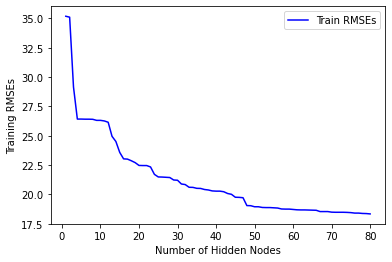


----Non Optimal Testing-----



----------Testing----------

For 80 hidden-nodes test rmse is: 17.95

Testing time: 0.055 seconds


In [ ]:
print("-----Non Optimal Training----")
final_random_nodes, final_init_wt, final_rmses, node_list = model_training(x_train)
print()
visualize(node_list, final_rmses)
print()
print("----Non Optimal Testing-----")
print()
model_testing(final_init_wt, final_random_nodes)

In [ ]:
# options = {'c1': 1, 'c2': 3, 'w': 1}

# # Call instance of PSO
# optimizer = GlobalBestPSO(n_particles=x_train.shape[0], dimensions=x_train.shape[1],
#                                     options=options)
# print()
# # Perform optimization
# print("-----Optimal Training----")
# print()
# op_random_nodes, op_init_wt, op_rmses, node_list = optimizer.optimize(model_training, iters = 1000)
# print()
# visualize(node_list, op_rmses)
# print()
# print("----Optimal Testing-----")
# model_testing(op_init_wt, op_random_nodes)